#Competição de Machine Learn da Flay.

####Objetivo: Prever qual o salario de um funcionário a partir de uma base de dados.

####Métrica de Avaliação: MAE (erro médio absoluto)


######Esse notebook foi criado após outro notebook com a Análise exploratória dos dados. Os agrupamentos e transformações dos dados foram criados a partir dessa análise em vista dos possíveis significados das classes e na tentativa de assemelhar features numéricas à uma curva normal.

#####Com essa resolução consegui duas grandes conquistas:
- Meu primeiro modelo de Aprendizado de maquina.
- O quarto lugar na competição.

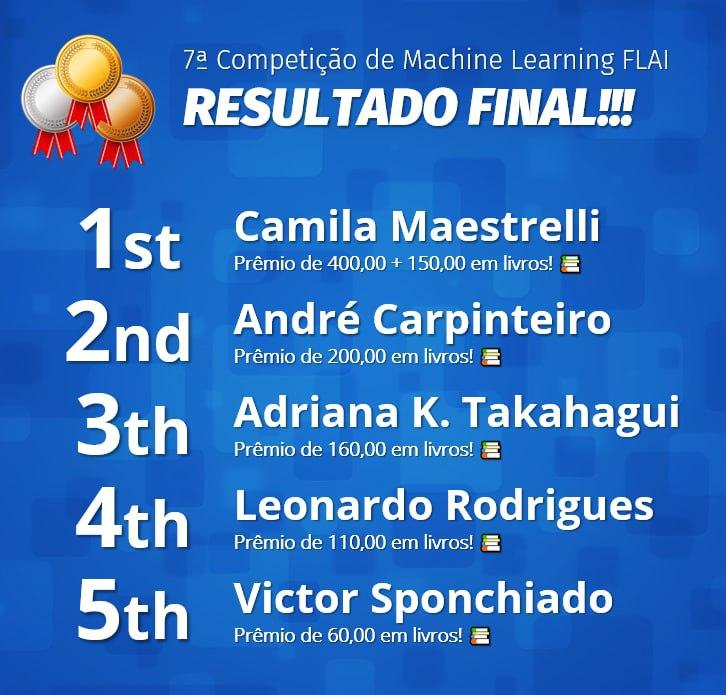

#Importações e DataSet

In [1]:
#!pip install scikit-learn==0.23.2
#!pip install -q pycaret

In [2]:
import pandas as pd
import numpy as np
#from pycaret.regression import *
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [3]:
treino = pd.read_csv('/content/drive/MyDrive/DSA/treino(1).csv')
teste = pd.read_csv('/content/drive/MyDrive/DSA/teste.csv')

In [4]:
treino.head()

,sexo,idade,faixa_etaria,cor_raca,escolaridade,horas_trabalho_por_semana,portador_de_deficiencia,tamanho_da_empresa,tempo_no_emprego,remuneracao,id
0,1,31,5,8,7,44,0,10,3.8,2551.21,1559958
1,1,58,7,8,7,44,0,3,1.9,3248.53,520410
2,2,58,7,99,7,30,0,7,255.9,1662.69,2373235
3,1,29,4,8,7,44,0,8,0.4,918.82,1358000
4,1,54,7,99,9,40,0,10,132.9,6479.11,155786


#Pre-processamento

#####Transformação na variável idade em uma curva normal

In [5]:
scaler = StandardScaler()
qtransformer = QuantileTransformer(n_quantiles=200,output_distribution="normal")


In [6]:
idade_scaler = scaler.fit_transform(treino[['idade']])
idade_scaler.max()

3.9261797137943977

##funções e dicionarios de Agrupamentos

In [7]:
def agrupar_tamanho(x):

  if x==-1 or x==10:
    return 6
  elif x<5:
    return x
  else:
    return 5

In [8]:
def agrupar_escolaridade(x):
  '''
    Retorna:
    0 : Medio incompleto
    1 : Superior incompleto
    2 : acima de superior
  '''
  if x<7:
    return 0
  elif x<9:
    return 1
  else:
    return 2


In [9]:
def agrupar_horas(x):
  #if x<=30:
  #  return 'meio-periodo'
  #else: 
  #  return 'periodo inteiro' 
  if x<=24:
    return '20'
  if x<=34:
    return '30'
  else: 
    return '40'

In [10]:
def agrupar_tempo(x):
  if x<=6:
    return '<=6'
  elif x<=32:
    return '<=32'
  elif x<=74:
    return '<=74'
  elif x<=148:
    return '<=148'
  elif x<=228:
    return '<=228'
  elif x<=305:
    return '<=305'
  else:
    return '>305'

In [11]:
def agrupar_faixa_etaria(x):
  if x<4:
    return 0
  elif x<=6:
    return x-3
  else:
    return 4

In [12]:
def agrupar_cor_raca(x):
  if x==1:
    return 'Indigena'
  elif x ==4 or x==8:
    return 'PP'
  elif x==6:
    return 'Amarelo'
  elif x==9:
    return 'Outro'
  elif x==2:
    return 'Branco e amarelo'
  else:
    return 'Ignorado'

In [13]:
#Mulheres ficam com a variável 1 e homens 0
mapa_sexo={1:0,2:1}

In [14]:
mapa_cor_raca = {1:0,2:1,4:2,6:3,7:4,8:5,9:6,99:2}

In [15]:
map_tam_empresa = {
    1:0,
    2:2,
    3:7,
    4:15,
    5:35,
    6:75,
    7:175,
    8:375,
    9:750,
    10:100,
    -1:0
}

###Função principal

#####Os comentarios em codigo dentro das funções principais foram diversos testes de transformações e agrupamentos que mudavam sua relevância ao longo das transformações dos dados.

In [16]:
def preprocessamento(dado):

  dado=dado.copy()


  #-------Tamanho da Empresa-----------

  dado['tamanho_da_empresa']=dado['tamanho_da_empresa'].map(map_tam_empresa)


  #-------Horas Trabalho Por Semana----

  dado['horas_trabalho_por_semana']=dado['horas_trabalho_por_semana'].apply(agrupar_horas)


  #-------Escolaridade-----------------

  dado['escolaridade']=dado['escolaridade'].apply(agrupar_escolaridade)


  #-------Tempo no Emprego-------------

  #dado['classe_tempo_empresa']=dado['tempo_no_emprego'].apply(agrupar_tempo)
  dado['tempo_no_emprego']=(dado['tempo_no_emprego']/12).round()
  q_tem_emp = dado['tempo_no_emprego'].quantile(.95)
  dado['tempo_no_emprego'] = dado['tempo_no_emprego'].apply(lambda x:x if x<q_tem_emp else q_tem_emp)


  #-------Faixa Etária-----------------

  dado['faixa_etaria']=dado['faixa_etaria'].apply(agrupar_faixa_etaria)


  #-------Idade-----------------------
  q_idade = dado['idade'].quantile(.95)
  dado['idade']=dado['idade'].apply(lambda x: x if x<q_idade else q_idade)


  #-------Cor Raça---------------------

  dado['cor_raca']=dado['cor_raca'].apply(agrupar_cor_raca)


  #dado['tempo_e_idade']=scaler.fit_transform(pd.DataFrame(dado['idade']*dado['tempo_no_emprego']))

  #dado['faixa_etaria']=dado['faixa_etaria']/dado['faixa_etaria'].max()
  dado['faixa_etaria']=scaler.fit_transform(dado[['faixa_etaria']])
  #dado['escolaridade']=dado['escolaridade']/dado['escolaridade'].max()
  dado['escolaridade']=scaler.fit_transform(dado[['escolaridade']])
  #dado['tamanho_da_empresa']=dado['tamanho_da_empresa']/dado['tamanho_da_empresa'].max()
  dado['tamanho_da_empresa']=scaler.fit_transform(dado[['tamanho_da_empresa']])
  dado['tempo_no_emprego']=scaler.fit_transform(dado[['tempo_no_emprego']])

  dado['sexo']=dado['sexo'].map(mapa_sexo)

  dado.drop('id', axis=1, inplace=True)
  #dado.drop('tempo_no_emprego', axis=1, inplace=True)
  dado.drop('idade', axis=1, inplace=True)

  
  dado =  pd.get_dummies(dado, ['cor_raca','horas_trabalho_por_semana'])

  return dado
  

#Regressão

In [17]:
treino_processado = preprocessamento(treino)
treino_processado.head()

teste_processado = preprocessamento(teste)

##KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [34]:
def regressao(dados, quantil=1, exp=1):

  ##------O melhor resultado foi utilizar o logaritimo do y dentre muitas transformações---
  X = dados.drop('remuneracao', axis=1)
  y = np.log(dados['remuneracao'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


##------------------------Encontrar melhores parametros -------------------
  params = {
      'n_neighbors':np.arange(1,100,5)
  }


  KNN = KNeighborsRegressor()

  clf = RandomizedSearchCV(KNN, params,scoring='neg_mean_absolute_error')
  busca_param = clf.fit(X_train, y_train)

  resultado_busca = busca_param.best_params_

#--------------------------------------------------------------------------

  KNN = KNeighborsRegressor(n_neighbors=resultado_busca['n_neighbors'])

  modelo = KNN.fit(X_train, y_train)


  resultado = np.exp(modelo.predict(X_test))

  mae = mean_absolute_error(np.exp(y_test), resultado)

  return (resultado_busca, mae)

In [20]:
def interacao_KNN(dados, quantil=1):
  array = np.arange(1,30,1)
  resultado=np.array([])
  for x in array:
    lista=np.array([])
    for c in range(50):
      reg = regressao(dados,x, quantil)
      lista = np.append(lista,reg)
    print(str(x)+' - '+str(lista.mean()))
    resultado = np.append(resultado,lista.mean())
  return pd.DataFrame([array,resultado**4])

#####Resultado do KNN

In [21]:
regressao(treino_processado)

({'n_neighbors': 21}, 1381.3384752899917)

##Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

def regressao_rf(dados, quantil=1, teste=False):

  params={
      'max_depth':np.arange(2,50,1)
  }

  dados=dados.copy()

  #----O melhor resultado foi utilizar o logaritimo de y dentre muitas tentativas de transformações -----
  
  X = dados.drop('remuneracao', axis=1)
  y = np.log(dados['remuneracao'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



##-------------Parte do código usada para testar quantis--------------
#  quantil = y_train.quantile(quantil)
#
#  y_train = y_train.apply(lambda x: x if x<quantil else quantil)



##----------------------Parte do codigo usada para escolher parametros-----------
#----Usei uma vez e registrei os parametros para não perder tempo rodando


# rf = RandomForestRegressor()
#
# clf = RandomizedSearchCV(rf, params,scoring='neg_mean_absolute_error',verbose=1)
# busca_param = clf.fit(X_train, y_train)
#
# resultado_busca = busca_param.best_params_
# print(resultado_busca)

#------------------------------------------------------------------------------


  rf = RandomForestRegressor(max_depth=10, criterion='absolute_error', verbose=1, n_jobs=-1)

  rf.fit(X_train, y_train)

  predito = np.exp(pd.DataFrame(rf.predict(X_test)))

  mae = mean_absolute_error(np.exp(y_test),predito)
  print(mae)


  resposta =  np.exp(rf.predict(teste))
  return resposta


#####Resultado do Random Forest

In [23]:
resposta = regressao_rf(treino_processado, teste=teste_processado)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


1365.2819790940648


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


##Criação do dataframe para a Submissão

In [24]:
subm = pd.DataFrame()
subm['remuneracao'] = resposta

In [25]:
subm

,remuneracao
0,1722.789312
1,1427.046616
2,5678.013146
3,2522.405620
4,1685.513342
...,...
14995,3245.327977
14996,1318.915054
14997,1485.812675
14998,1180.928717


##Conferência de IDs na base de treino e na base de teste

In [26]:
#Apenas os 20 primeiros para ter certeza da existência ou não desses IDs

count = 0
for x in treino['id']:
  print(x)
  count+=1
  if count>20:break

1559958
520410
2373235
1358000
155786
1531046
759415
194193
2208546
772589
2325698
67085
1881416
887195
1799375
1099743
2127583
1506958
84711
1976930
1682209


####Criação de uma lista com os IDs repetidos

In [27]:
c = 0
repetidas = []

for x in treino['id'].values:
  if x in teste['id'].values:
    repetidas.append(x)


####Criação de tuplas com o ID e a target

In [28]:
tuplas = []
for x in repetidas:
  valor = treino[treino['id']==x]
  tuplas.append((x, float(valor['remuneracao'])))

#Print da quantidade de IDs repetidos
print(len(tuplas))


7483


####Criação da variável remuneracao em teste com a resposta do Random Forest

In [29]:
teste['remuneracao']=resposta

####Substituição dos valores na base de teste

In [30]:
for tupla in tuplas:
  indice = teste[teste['id']==tupla[0]].index.values[0]
  teste.iloc[indice, 10]=tupla[1]

In [31]:
sub = teste.copy()[['remuneracao']]

In [32]:
sub

,remuneracao
0,1722.789312
1,2056.390000
2,5678.013146
3,2643.240000
4,2361.310000
...,...
14995,10626.760000
14996,1197.430000
14997,1341.040000
14998,1180.928717


- Apesar do erro médio absoluto estar por volta de 1300 dentro desse código, quando foi submetido com os ids conferidos o erro médio absoluto baixou para a casa dos 600.
- Os principais insights para que fosse alcançado um resultado bom na competição foi a questão da checagem dos Ids, os agrupamentos e preprocessamento num geral e principalmente a utilização da transformação logaritima na variável target.  

In [33]:
sub.to_csv('submissão1.csv', index = False)